In [2]:
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from skimage import feature
from skimage import filters
import numpy as np
import imageio
%matplotlib inline
plt.rcParams.update({'image.interpolation': None})
plt.rcParams.update({'font.size': 15})

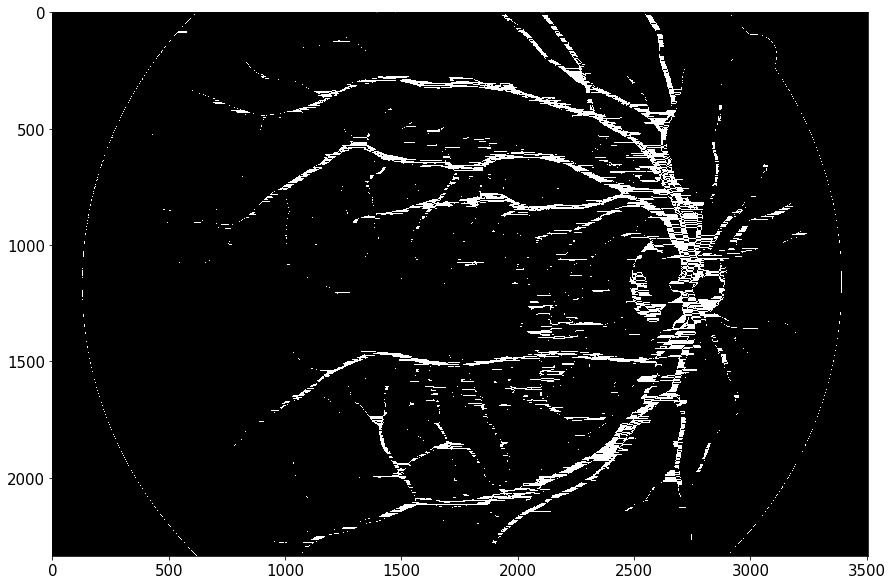

In [51]:
I_easy = np.asarray(imageio.imread('easy1.jpg'))

Ir_easy = I_easy[:,:,0]

Ig_easy = I_easy[:,:,1]

Ib_easy = I_easy[:,:,2]

from skimage import feature
#A_canny_default = feature.canny(Ig_easy)
A_canny_default = feature.canny(Ig_easy, sigma=0.4, low_threshold=0.1*np.max(Ig_easy), high_threshold=0.15*np.max(Ig_easy))
L = 60 
gh = A_canny_default
gh_conn = A_canny_default
row_number, column_number = gh.shape
for i in range(row_number):
    counter = 0
    edge_begin = 0
    for j in range(column_number):
        if (gh[i,j] == 1) and (counter == 0):
            edge_begin = 1
        elif (gh[i,j] == 1) & (counter > L):
            counter = 0
        elif (gh[i,j] == 0) & (edge_begin == 1):
            counter += 1
        elif (gh[i,j] == 1) & (counter <= L):
            gh_conn[i,j-counter:j] = 1
            edge_begin = 0
            counter = 0
plt.figure(figsize=(15,10))
plt.imshow(gh_conn,cmap="gray")

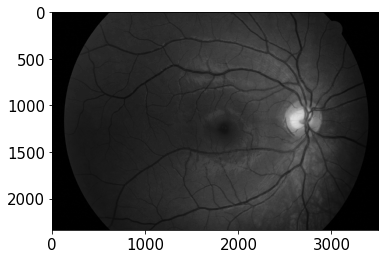

In [31]:
I_easy = np.asarray(imageio.imread('easy1.jpg'))

Ir_easy = I_easy[:,:,0]

Ig_easy = I_easy[:,:,1]

Ib_easy = I_easy[:,:,2]

average_kernel = np.ones((13,13))/169
I1_smoothed = ndimage.convolve(Ig_easy,average_kernel, mode="nearest")
plt.imshow(I1_smoothed,cmap="gray", vmin=0, vmax=255)

In [15]:
np.min(I1_smoothed)

0

In [ ]:
plt.hist(I1_smoothed,bins=256)

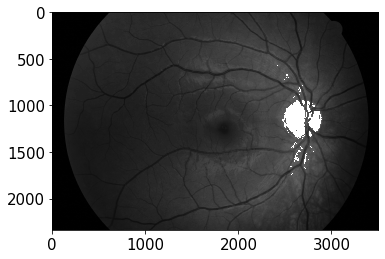

In [30]:
c=np.where(Ig_easy<100,I1_smoothed,255)
plt.imshow(c,cmap="gray", vmin=0, vmax=255)

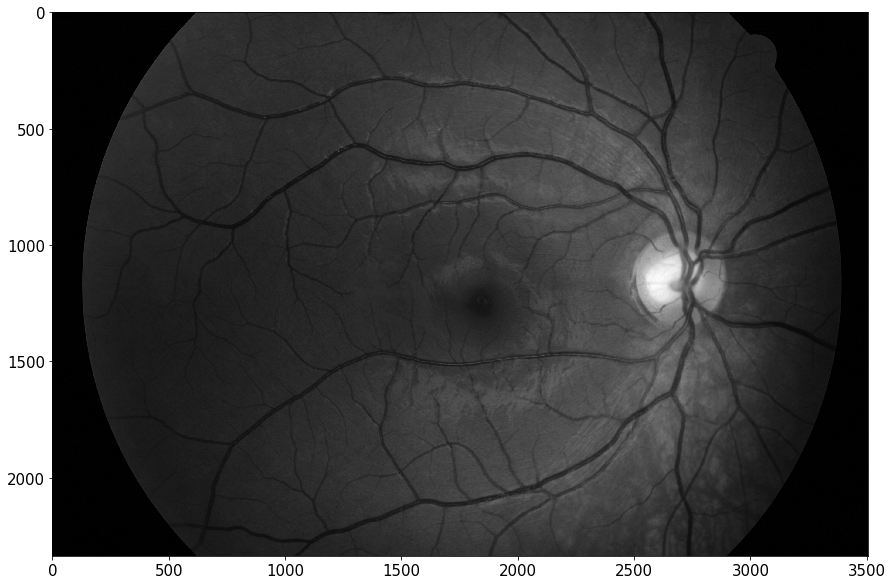

In [29]:
plt.figure(figsize=(15,10))
plt.imshow(Ig_easy,cmap="gray")

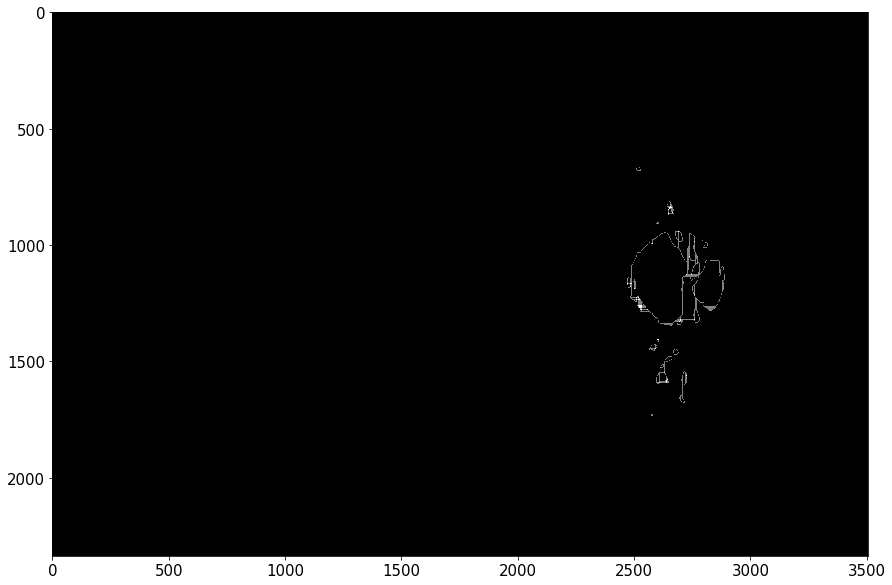

In [27]:
sobel_horiz = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_vert = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
I2=c
gx = ndimage.convolve(I2.astype(float), sobel_horiz, mode='nearest')
gy = ndimage.convolve(I2.astype(float), sobel_vert, mode='nearest')
M = abs(gx)+abs(gy)
alpha = np.rad2deg(np.arctan(gy/(gx+0.0000001)))

Tm = 0.15*np.max(M)
Ta = 45
gh = np.where((M > Tm)&((alpha < Ta)&(alpha > -Ta)), 1, 0)

Tm = 0.15*np.max(M)
Ta = 45
A = 90
gv = np.where((M > Tm)&((np.abs(alpha) < A+Ta)&(np.abs(alpha) > A-Ta)), 1 , 0)

L = 50 
gh_conn = gh
row_number, column_number = gh.shape
for i in range(row_number):
    counter = 0
    edge_begin = 0
    for j in range(column_number):
        if (gh[i,j] == 1) and (counter == 0):
            edge_begin = 1
        elif (gh[i,j] == 1) & (counter > L):
            counter = 0
        elif (gh[i,j] == 0) & (edge_begin == 1):
            counter += 1
        elif (gh[i,j] == 1) & (counter <= L):
            gh_conn[i,j-counter:j] = 1
            edge_begin = 0
            counter = 0
                      
L = 50 
gv_T = gv.T
gv_conn = gv.T
row_number, column_number = gv_T.shape
for i in range(row_number):
    counter = 0
    edge_begin = 0
    for j in range(column_number):
        if (gv_T[i,j] == 1) and (counter == 0):
            edge_begin = 1
        elif (gv_T[i,j] == 1) & (counter > L):
            counter = 0
        elif (gv_T[i,j] == 0) & (edge_begin == 1):
            counter += 1
        elif (gv_T[i,j] == 1) & (counter <= L):
            gv_conn[i,j-counter:j] = 1
            edge_begin = 0
            counter = 0

gv_conn = gv_conn.T   

g_conn = gh_conn + gv_conn   

plt.figure(figsize=(15,10))
plt.imshow(g_conn,cmap="gray")

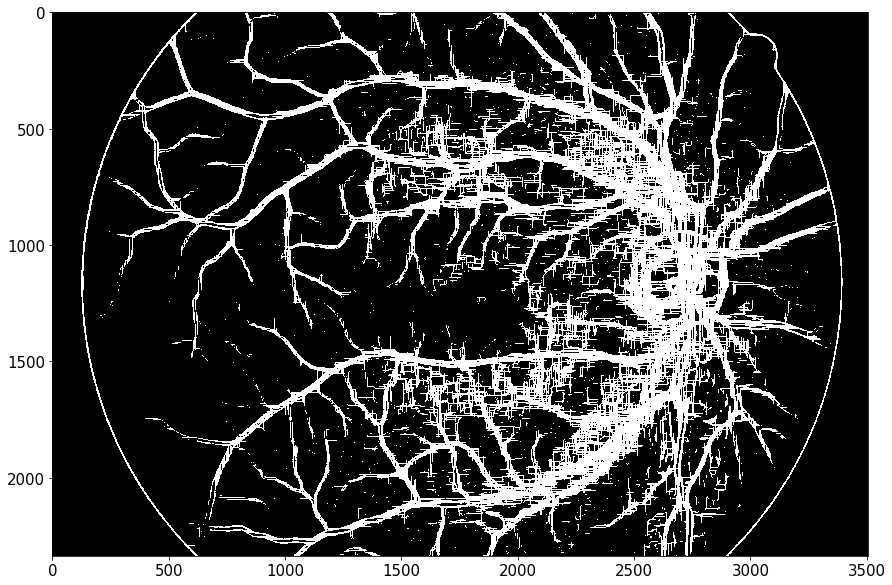

In [58]:
plt.figure(figsize=(15,10))
plt.imshow(g_conn>0.5,cmap="gray")

In [47]:
def kernel_guassian(m, st):
    x = np.linspace(-(m-1)/2., (m-1)/2., m)
    gauss = np.exp(-0.5*np.square(x)/np.square(st))
    kernel = np.outer(gauss, gauss)
    k = kernel/np.sum(kernel)
    return k


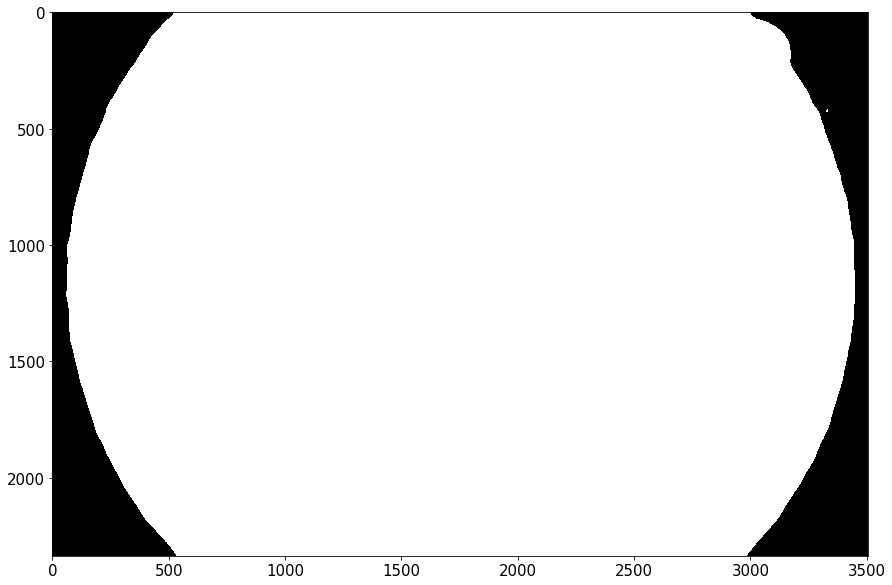

In [50]:
k = kernel_guassian(151, 25)
If = ndimage.convolve(Ig_easy, k)
t = 0.4
It = np.where(If < t, 0, 1)
plt.figure(figsize=(15,10))
plt.imshow(It,cmap='gray')

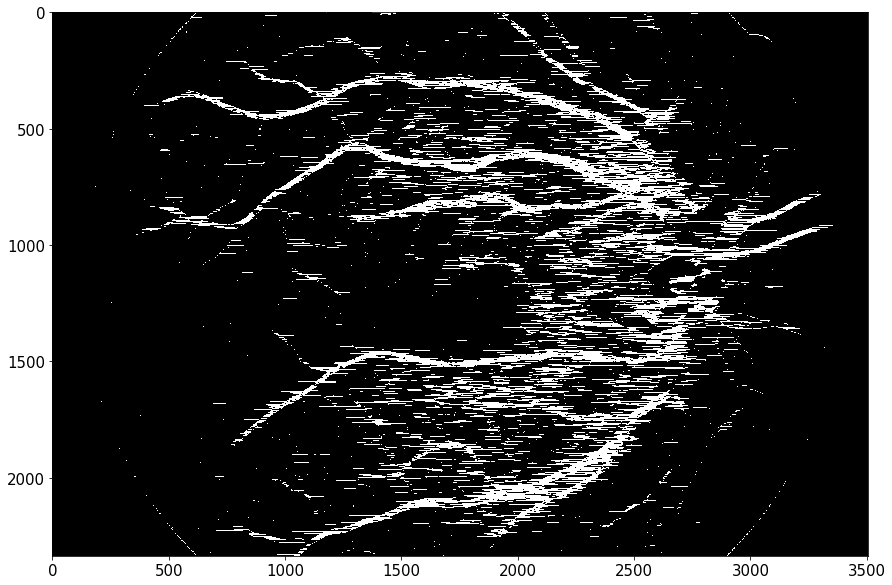

In [35]:
plt.figure(figsize=(15,10))
plt.imshow(gh_conn,cmap="gray")

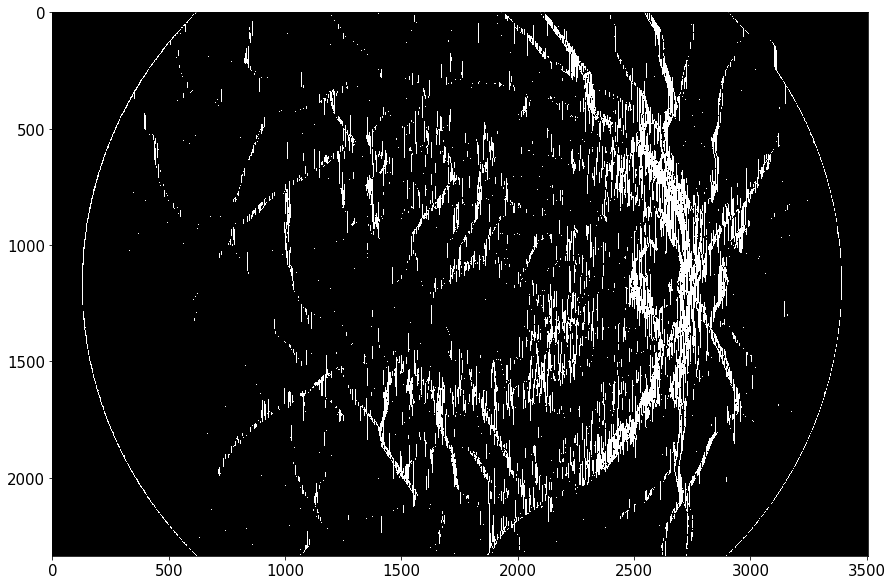

In [36]:
plt.figure(figsize=(15,10))
plt.imshow(gv_conn,cmap="gray")

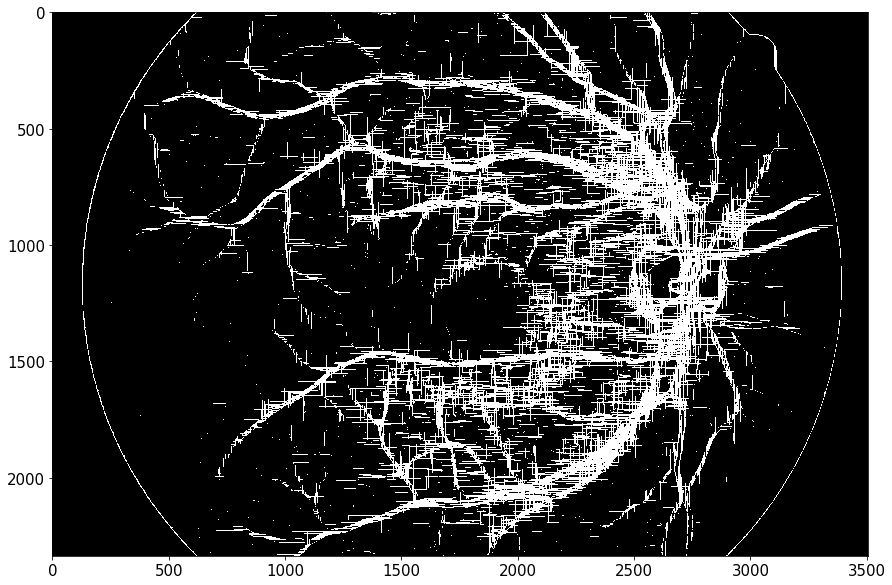

In [38]:
plt.figure(figsize=(15,10))
plt.imshow(g_conn>0.8,cmap="gray")

In [39]:
A_canny_default = feature.canny(g_conn)

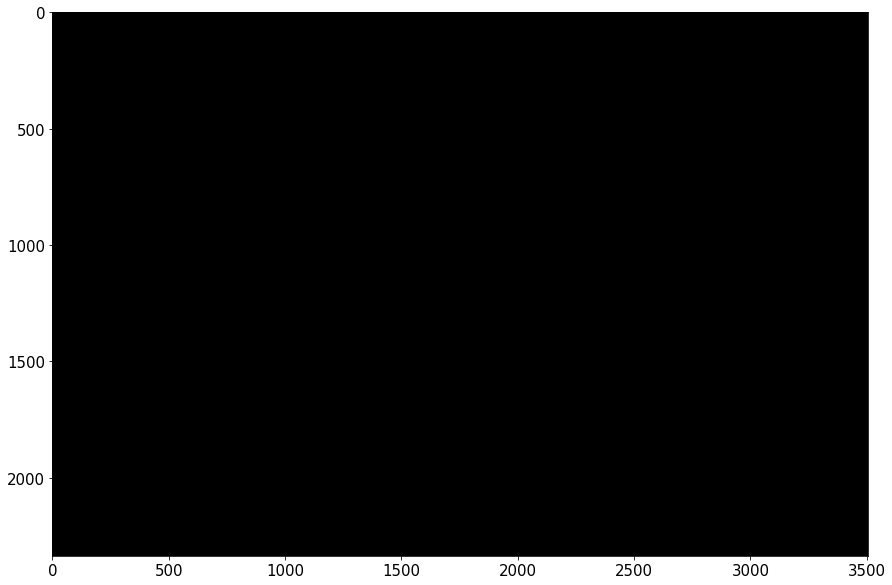

In [40]:
plt.figure(figsize=(15,10))
plt.imshow(A_canny_default ,cmap="gray")

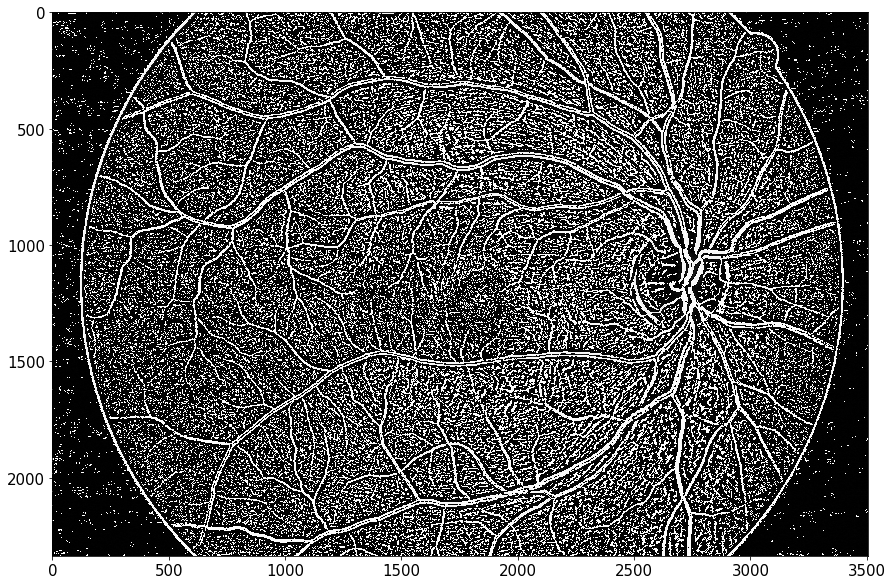

In [9]:
I_easy = np.asarray(imageio.imread('easy1.jpg'))
Ir_easy = I_easy[:,:,0]
Ig_easy = I_easy[:,:,1]
Ib_easy = I_easy[:,:,2]
average_kernel = np.ones((21,21))/441
Ig_easyn = ndimage.convolve(Ig_easy,average_kernel, mode="nearest")
I=Ig_easy-Ig_easyn
plt.figure(figsize=(15,10))
plt.imshow(I,cmap="gray")

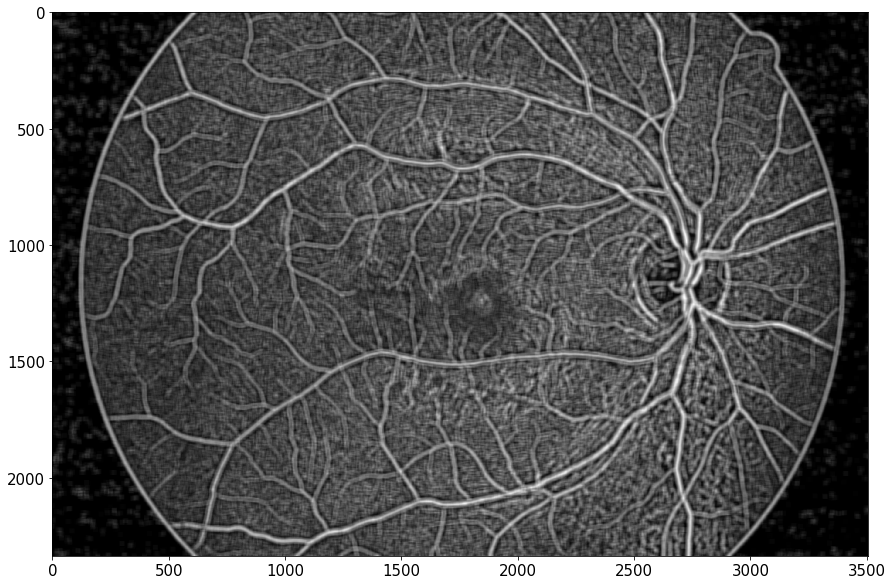

In [10]:
average_kernel = np.ones((21,21))/441
Ig_easyn = ndimage.convolve(I,average_kernel, mode="nearest")
plt.figure(figsize=(15,10))
plt.imshow(Ig_easyn,cmap="gray")

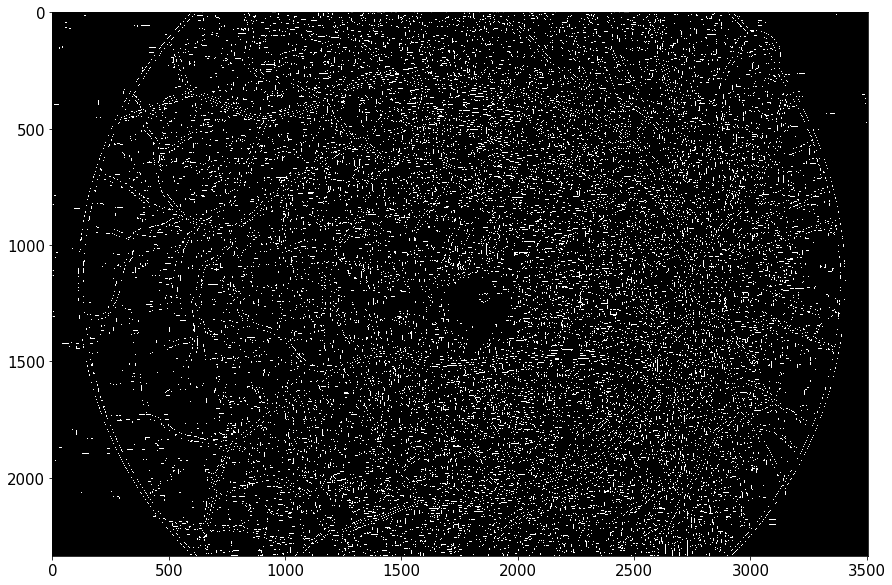

In [11]:
A_canny_default = feature.canny(Ig_easyn)
plt.figure(figsize=(15,10))
plt.imshow(A_canny_default,cmap="gray")

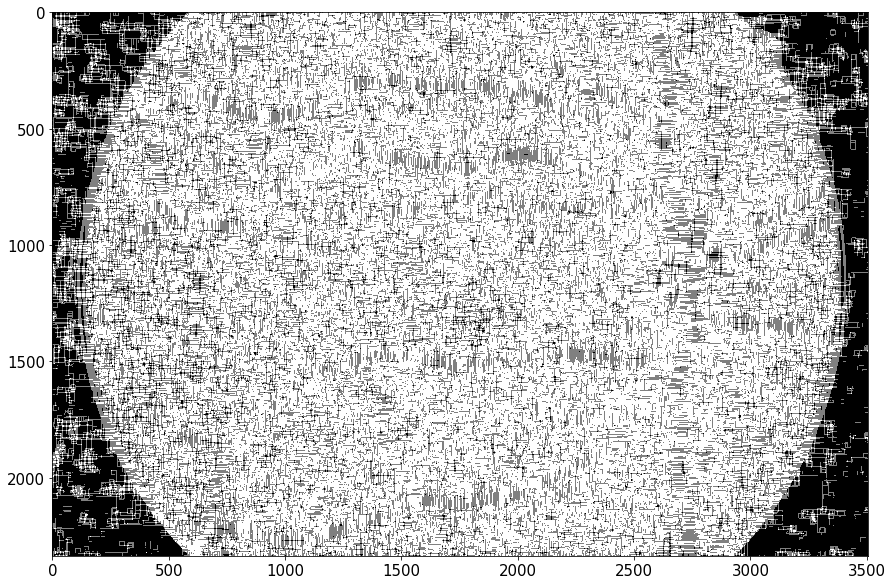

In [12]:
sobel_horiz = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_vert = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
I2=Ig_easyn
gx = ndimage.convolve(I2.astype(float), sobel_horiz, mode='nearest')
gy = ndimage.convolve(I2.astype(float), sobel_vert, mode='nearest')
M = abs(gx)+abs(gy)
alpha = np.rad2deg(np.arctan(gy/(gx+0.0000001)))

Tm = 0.1*np.max(M)
Ta = 45
gh = np.where((M > Tm)&((alpha < Ta)&(alpha > -Ta)), 1, 0)

Tm = 0.1*np.max(M)
Ta = 45
A = 90
gv = np.where((M > Tm)&((np.abs(alpha) < A+Ta)&(np.abs(alpha) > A-Ta)), 1 , 0)

L = 50 
gh_conn = gh
row_number, column_number = gh.shape
for i in range(row_number):
    counter = 0
    edge_begin = 0
    for j in range(column_number):
        if (gh[i,j] == 1) and (counter == 0):
            edge_begin = 1
        elif (gh[i,j] == 1) & (counter > L):
            counter = 0
        elif (gh[i,j] == 0) & (edge_begin == 1):
            counter += 1
        elif (gh[i,j] == 1) & (counter <= L):
            gh_conn[i,j-counter:j] = 1
            edge_begin = 0
            counter = 0
                      
L = 50 
gv_T = gv.T
gv_conn = gv.T
row_number, column_number = gv_T.shape
for i in range(row_number):
    counter = 0
    edge_begin = 0
    for j in range(column_number):
        if (gv_T[i,j] == 1) and (counter == 0):
            edge_begin = 1
        elif (gv_T[i,j] == 1) & (counter > L):
            counter = 0
        elif (gv_T[i,j] == 0) & (edge_begin == 1):
            counter += 1
        elif (gv_T[i,j] == 1) & (counter <= L):
            gv_conn[i,j-counter:j] = 1
            edge_begin = 0
            counter = 0

gv_conn = gv_conn.T   

g_conn = gh_conn + gv_conn   

plt.figure(figsize=(15,10))
plt.imshow(g_conn,cmap="gray")

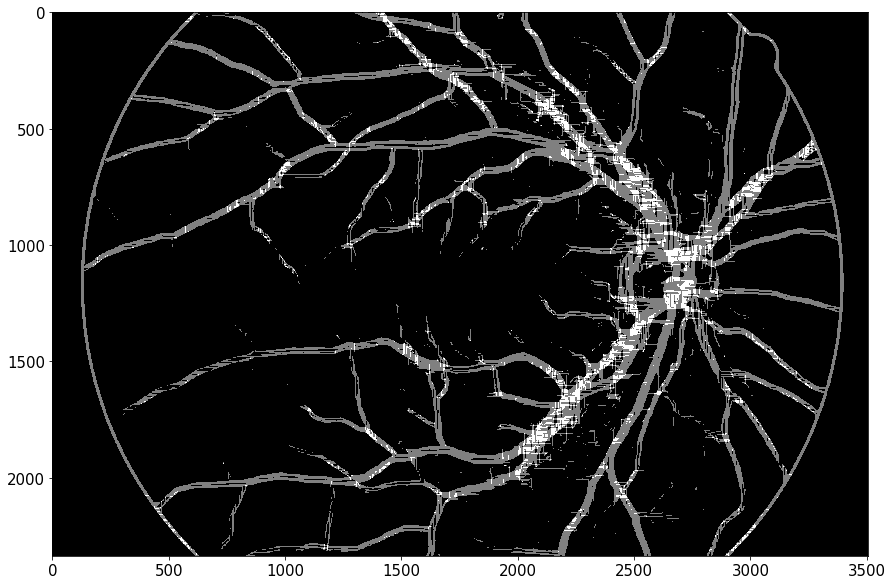

In [24]:
I_easy = np.asarray(imageio.imread('medium1.jpg'))

Ir_easy = I_easy[:,:,0]
Ig_easy = I_easy[:,:,1]
Ib_easy = I_easy[:,:,2]
average_kernel = np.ones((13,13))/169
Ig_easy13 = ndimage.convolve(Ig_easy,average_kernel, mode="nearest")
#plt.figure(figsize=(15,10))
#plt.imshow(Ig_easy13,cmap="gray")

obel_horiz = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_vert = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
I2=Ig_easy13
gx = ndimage.convolve(I2.astype(float), sobel_horiz, mode='nearest')
gy = ndimage.convolve(I2.astype(float), sobel_vert, mode='nearest')
M = abs(gx)+abs(gy)
alpha = np.rad2deg(np.arctan(gy/(gx+0.0000001)))

Tm = 0.1*np.max(M)
Ta = 45
gh = np.where((M > Tm)&((alpha < Ta)&(alpha > -Ta)), 1, 0)

Tm = 0.1*np.max(M)
Ta = 45
A = 90
gv = np.where((M > Tm)&((np.abs(alpha) < A+Ta)&(np.abs(alpha) > A-Ta)), 1 , 0)

L = 40 
gh_conn = gh
row_number, column_number = gh.shape
for i in range(row_number):
    counter = 0
    edge_begin = 0
    for j in range(column_number):
        if (gh[i,j] == 1) and (counter == 0):
            edge_begin = 1
        elif (gh[i,j] == 1) & (counter > L):
            counter = 0
        elif (gh[i,j] == 0) & (edge_begin == 1):
            counter += 1
        elif (gh[i,j] == 1) & (counter <= L):
            gh_conn[i,j-counter:j] = 1
            edge_begin = 0
            counter = 0
                      
L = 40
gv_T = gv.T
gv_conn = gv.T
row_number, column_number = gv_T.shape
for i in range(row_number):
    counter = 0
    edge_begin = 0
    for j in range(column_number):
        if (gv_T[i,j] == 1) and (counter == 0):
            edge_begin = 1
        elif (gv_T[i,j] == 1) & (counter > L):
            counter = 0
        elif (gv_T[i,j] == 0) & (edge_begin == 1):
            counter += 1
        elif (gv_T[i,j] == 1) & (counter <= L):
            gv_conn[i,j-counter:j] = 1
            edge_begin = 0
            counter = 0

gv_conn = gv_conn.T   

g_conn = gh_conn + gv_conn   

plt.figure(figsize=(15,10))
plt.imshow(g_conn,cmap="gray")

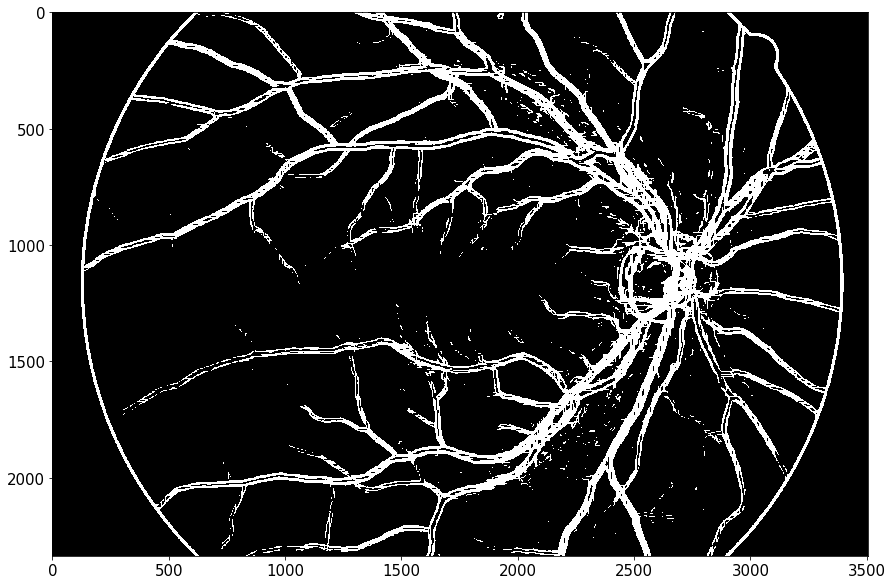

In [23]:
plt.figure(figsize=(15,10))
plt.imshow(g_conn>0.5,cmap="gray")